# KDD Cup: predicting customer behavior

The task is to estimate the churn, appetency and up-selling probability of customers, hence there are three target values to be predicted. The challenge is staged in phases to test the rapidity with which each team is able to produce results. A large number of variables (15,000) is made available for prediction. However, to engage participants having access to less computing power, a smaller version of the dataset with only 230 variables will be made available in the second part of the challenge.

<img src='https://cdn.livechatinc.com/website/uploads/2016/04/customer-churn@2x.jpg' style="width:400px;"/>

In [2]:
#Dowloading Data
##Features

#!wget -O ./data/orange_small_train.zip http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train.data.zip
#!wget -O ./data/orange_small_test.zip http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_test.data.zip

## Targets 
#!wget -O ./data/appentency_train http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_appetency.labels
#!wget -O ./data/churn_train http://www.kdd.org/cupfiles/KDDCupData/2009/files/orange_small_train_churn.labels
#!wget -O ./data/train_upselling http://www.kdd.org/cupfiles/KDDCupData/2009/orange_small_train_upselling.labels

#!unzip ./data/orange_small_test.zip -d ./data/
#!unzip ./data/orange_small_train.zip  -d ./data/


In [3]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Reading Data
X  = pd.read_table('./data/orange_small_train.data', delimiter='\t', header=0)
y1 = pd.read_table('./data/orange_small_train_churn.labels', names=['Churn'])
y2 = pd.read_table('./data/orange_small_train_appetency.labels', names=['Appetency'])
y3 = pd.read_table('./data/orange_small_train_upselling.labels', names=['Upselling'])


### About Data
* The first 190 variables are numerical and the last 40 are categorical.

In [4]:
X.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9,Var10,...,Var221,Var222,Var223,Var224,Var225,Var226,Var227,Var228,Var229,Var230
0,NaN,NaN,NaN,NaN,NaN,1526.0,7.0,NaN,NaN,NaN,...,oslk,fXVEsaq,jySVZNlOJy,NaN,NaN,xb3V,RAYp,F2FyR07IdsN7I,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,525.0,0.0,NaN,NaN,NaN,...,oslk,2Kb5FSF,LM8l689qOp,NaN,NaN,fKCe,RAYp,F2FyR07IdsN7I,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,5236.0,7.0,NaN,NaN,NaN,...,Al6ZaUT,NKv4yOc,jySVZNlOJy,NaN,kG3k,Qu4f,02N6s8f,ib5G6X1eUxUn6,am7c,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,oslk,CE7uk3u,LM8l689qOp,NaN,NaN,FSa2,RAYp,F2FyR07IdsN7I,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,1029.0,7.0,NaN,NaN,NaN,...,oslk,1J2cvxe,LM8l689qOp,NaN,kG3k,FSa2,RAYp,F2FyR07IdsN7I,mj86,NaN


## Preprocessing

* Missing data seems to be a problem

***Lets explore!***



In [5]:
def percentual (percentual, total):
    percentual = (percentual/100)*total
    return percentual
def countNAratio(pd_dataframe, inicial, final):
        n_rows = pd_dataframe.shape[0]
        p_inicial = percentual(inicial,n_rows)
        p_final   = percentual(final,n_rows)
        col_with_na =  (pd_dataframe.isna().sum() >= p_inicial) & (pd_dataframe.isna().sum() <= p_final)
        return col_with_na.sum()

missing_num = []
missing_cat = []

range_ = [
         {'inicial':0, 'final':10},
         {'inicial':11, 'final':20},
         {'inicial':21, 'final':30},
         {'inicial':31, 'final':40},
         {'inicial':41, 'final':50},
         {'inicial':51, 'final':60},
         {'inicial':61, 'final':70},
         {'inicial':71, 'final':80},
         {'inicial':81, 'final':90},
         {'inicial':91, 'final':95},
         {'inicial':96, 'final':100}]

#for p in np.arange(10,110,10, dtype=int):
for p in range(0,len(range_)):
     missing_num.append({'Percentual':str(range_[p]['inicial'])+'% - '+str(range_[p]['final']) + '%',
                     'Qt_Numericas':countNAratio(X.loc[:,'Var1':'Var190'],range_[p]['inicial'],range_[p]['final'])})
for p in range(0,len(range_)):
     missing_cat.append({'Percentual':str(range_[p]['inicial'])+'% - '+str(range_[p]['final']) + '%',
                     'Qt_Categoticas':countNAratio(X.loc[:,'Var190':],range_[p]['inicial'],range_[p]['final'])})

df_missing_num = pd.DataFrame(missing_num)
df_missing_cat = pd.DataFrame(missing_cat)
df_missing_num.merge(df_missing_cat, on='Percentual')


,Percentual,Qt_Numericas,Qt_Categoticas
0,0% - 10%,3,25
1,11% - 20%,14,1
2,21% - 30%,1,0
3,31% - 40%,0,0
4,41% - 50%,2,0
5,51% - 60%,1,2
6,61% - 70%,0,0
7,71% - 80%,0,2
8,81% - 90%,0,0
9,91% - 95%,1,0


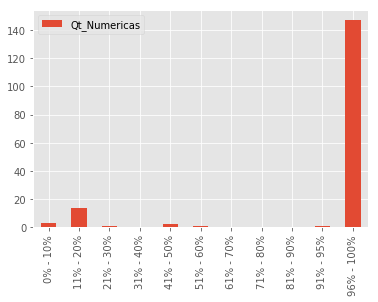

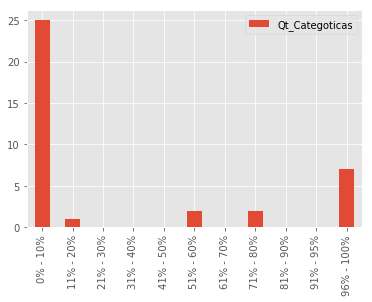

In [6]:
%matplotlib inline
plt.style.use('ggplot')
fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
df_missing_num.plot.bar(ax=ax)
df_missing_cat.plot.bar(ax=ax2)
ax.set_xticklabels(list(df_missing_num['Percentual']))
ax2.set_xticklabels(list(df_missing_num['Percentual']))
print()

In [7]:
def columnsNAratio(pd_dataframe, inicial, final):
        n_rows = pd_dataframe.shape[0]
        p_inicial = percentual(inicial,n_rows)
        p_final   = percentual(final,n_rows)
        col_with_na =  (pd_dataframe.isna().sum() >= p_inicial) & (pd_dataframe.isna().sum() <= p_final)
        return (col_with_na.loc[col_with_na == True]).index.values
colunas_na = columnsNAratio(X, 100,100)

In [8]:
variaveis = ' '.join(colunas_na)
total = colunas_na.size
print (
 """
 The following variables only has null values, hence will be excluded from DataFrame. ({total} ao todo):
  
 {variaveis}
 """.format(variaveis=variaveis, total=total))


 The following variables only has null values, hence will be excluded from DataFrame. (18 ao todo):
  
 Var8 Var15 Var20 Var31 Var32 Var39 Var42 Var48 Var52 Var55 Var79 Var141 Var167 Var169 Var175 Var185 Var209 Var230
 


In [9]:
# Processing categorical variables
categoricas = pd.DataFrame(X.drop(colunas_na, axis=1).loc[:,'Var191':])

categoricas_describe = categoricas.describe().T
categoricas_describe['Qtd %'] = (categoricas.isna().sum()*100)/50000
categoricas_describe['Qtd']   = categoricas.isna().sum()
categoricas_describe['Top %'] = (categoricas_describe['freq']*100)/50000

#Some columns still remain with a high proportion of null values or unique values (>95%),
# hence they will be excluded from model.

categoricas = categoricas.loc[:,(categoricas_describe['Qtd %'] < 95)]
categoricas = categoricas.loc[:,(categoricas_describe['Top %'] < 95)]

categoricas_describe = categoricas.describe().T
categoricas_describe['Qtd %'] = (categoricas.isna().sum()*100)/50000
categoricas_describe['Qtd']   = categoricas.isna().sum()
categoricas_describe['Top %'] = (categoricas_describe['freq']*100)/50000

categoricas_describe

,count,unique,top,freq,Qtd %,Qtd,Top %
Var192,49631,361,qFpmfo8zhV,385,0.738,369,0.77
Var193,50000,51,RO12,35964,0.000,0,71.928
Var194,12784,3,SEuy,12567,74.432,37216,25.134
Var197,49857,225,0Xwj,4629,0.286,143,9.258
Var198,50000,4291,fhk21Ss,4441,0.000,0,8.882
Var199,49996,5073,r83_sZi,955,0.008,4,1.91
Var200,24592,15415,yP09M03,73,50.816,25408,0.146
Var201,12783,2,smXZ,12777,74.434,37217,25.554
Var202,49999,5713,nyZz,198,0.002,1,0.396
Var203,49857,5,9_Y1,45233,0.286,143,90.466


In [10]:
# Vectorizing strings.
## In order to not add many more variables, I will get the top 100 values, and vectorize them

for i in categoricas_describe.index:
        top10=categoricas[i].value_counts()[:100,].index.values
        categoricas.loc[~categoricas[i].isin(top10),i] = 'NaN'

In [11]:
from sklearn.feature_extraction import DictVectorizer
vec= DictVectorizer(dtype=int, sparse=False)
x_cat = vec.fit_transform(categoricas.to_dict('records'))
X_categoricas = pd.DataFrame(data=x_cat[0:,0:], columns=vec.feature_names_)

In [12]:
X_categoricas.head()

,Var192=0vimfo8zhV,Var192=1GdOj17ejg,Var192=1GdOj1KXzC,Var192=1JGqrQKzJV,Var192=1JGr4RKzJV,Var192=1PnOj1KVEH,Var192=1YVgUHXZeb,Var192=1YVvyx7IEC,Var192=1fZWq6e2Rv,Var192=2jiWq69cTy,...,Var228=ib5G6X1eUxUn6,Var228=iyHGyLCEkQ,Var228=n1OBWGkV3fbsHR75taC,Var228=r_7E,Var228=xwM2aC7IdeMC0,Var229=NaN,Var229=am7c,Var229=mj86,Var229=oJmt,Var229=sk2h
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
# Imputing missing numerical Data with means

from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean')
numericas = pd.DataFrame(X.drop(colunas_na, axis=1).loc[:,:'Var190'])
x_numericas = imp.fit_transform(numericas)
X_numericas = pd.DataFrame(x_numericas[0:,0:], columns=numericas.columns)
imp.strategy
#X_numericas.head()

'mean'

In [14]:
#Some numeric columns has few values and can be categorical
X_numericas.describe()


,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,Var189,Var190
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,...,5.000000e+04,50000.000000,5.000000e+04,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,6.809496,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.611456,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
std,4.820354,0.022352,672.206258,0.226593,1.110451e+05,2532.849475,5.965363,18.326822,1.599995e+05,0.451721,...,4.482539e+05,2.367372,4.050112e+05,3.175127e+04,7.397512,1.039849,7.130844,17.949779,56.221658,2370.061624
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,8.000000,...,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,-6.420000,6.000000,0.000000
25%,11.487179,0.004029,425.298387,0.125396,2.387933e+05,581.000000,0.000000,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.000000,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
50%,11.487179,0.004029,425.298387,0.125396,2.387933e+05,945.000000,7.000000,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.000000,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
75%,11.487179,0.004029,425.298387,0.125396,2.387933e+05,1326.437116,7.000000,48.145299,3.926057e+05,8.625806,...,3.776755e+06,0.000000,1.416638e+06,7.777380e+04,8.460919,3.299145,16.544160,167.368477,270.142137,22007.045192
max,680.000000,5.000000,130668.000000,27.000000,6.048550e+06,131761.000000,140.000000,2300.000000,1.232559e+07,40.000000,...,1.428483e+07,49.000000,1.199478e+07,3.048400e+06,1200.000000,102.000000,910.000000,628.620000,642.000000,230427.000000


In [15]:
# Merging features
from sklearn.cross_validation import train_test_split 
X_processed = X_numericas.merge(X_categoricas, left_index=True, right_index=True)
X_processed.shape
X_train, X_test, y1_train, y1_test = train_test_split(X_processed, y1, random_state=0, train_size=0.7)
X_train, X_test, y2_train, y2_test = train_test_split(X_processed, y2, random_state=0, train_size=0.7)
X_train, X_test, y3_train, y3_test = train_test_split(X_processed, y3, random_state=0, train_size=0.7)


/usr/local/lib/python3.4/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
# Models Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier

model_rf_churn     = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")
model_rf_appetency = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")
model_rf_upsell    = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")

#model_logit_churn     = LogisticRegression()
#model_logit_appetency = LogisticRegression()
#model_logit_upsell    = LogisticRegression()

#Churn

model_rf_churn.fit(X_train, y1_train.values.ravel());
#model_logit_churn.fit(X_train, y1_train.values.ravel());

#Appetency
model_rf_appetency.fit(X_train, y2_train.values.ravel());
#model_logit_appetency.fit(X_train, y2_train.values.ravel());

#Up
model_rf_upsell.fit(X_train, y3_train.values.ravel());
#model_logit_upsell.fit(X_train, y3_train.values.ravel());
from sklearn.metrics import confusion_matrix

y1_predicted = model_rf_churn.predict(X_test)
y2_predicted = model_rf_appetency.predict(X_test)
y3_predicted = model_rf_upsell.predict(X_test)


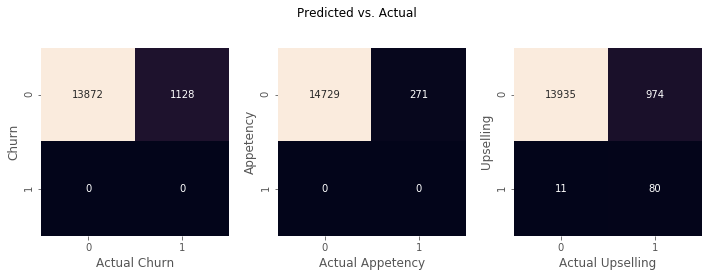

In [24]:
fig,axn = plt.subplots(1,3, sharex=False, sharey=False, figsize=(10,4))

mat1 = confusion_matrix(y1_test, y1_predicted)
mat2 = confusion_matrix(y2_test, y2_predicted)
mat3 = confusion_matrix(y3_test, y3_predicted)

sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,ax=axn.flat[0], )
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,ax=axn.flat[1])
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,ax=axn.flat[2])
fig.suptitle('Predicted vs. Actual')
axn[0].set_ylabel('Churn')
axn[1].set_ylabel('Appetency')
axn[2].set_ylabel('Upselling')
axn[0].set_xlabel('Actual Churn')
axn[1].set_xlabel('Actual Appetency')
axn[2].set_xlabel('Actual Upselling')
plt.tight_layout()

In [18]:
#import statsmodels.api as sm
#logit_model=sm.Logit(y1_train,X_train)
#result=logit_model.fit()
#print(result.summary())

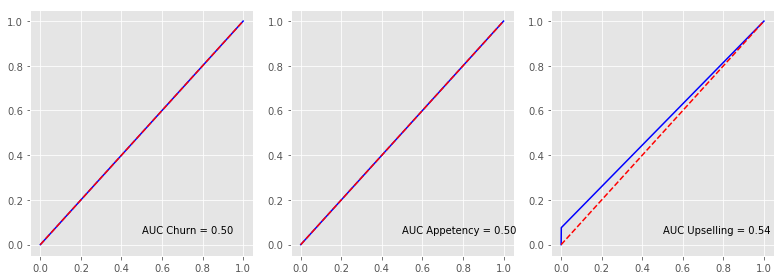

In [26]:
import sklearn.metrics as metrics

#fig2,axn2 = plt.subplots(1,3, sharex=False, sharey=False, figsize=(10,4))
fpr, tpr, thresholds    = metrics.roc_curve(y1_test['Churn'].values, y1_predicted)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2_test['Appetency'].values, y2_predicted)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y3_test['Upselling'].values, y3_predicted)

figura = plt.figure(figsize=(11,4))

ax = figura.add_subplot(131)
ax.plot(fpr, tpr, 'b',)
ax.plot([0,1],[0,1],'r--')
ax.text(x=.5, y=.05, s='AUC Churn = %0.2f'% metrics.auc(fpr, tpr))

ax2 = figura.add_subplot(132)
ax2.plot(fpr2, tpr2, 'b')
ax2.plot([0,1],[0,1],'r--')
ax2.text(x=.5, y=.05, s='AUC Appetency = %0.2f'% metrics.auc(fpr2, tpr2))

ax3 = figura.add_subplot(133)
ax3.plot(fpr3, tpr3, 'b')
ax3.plot([0,1],[0,1],'r--')
ax3.text(x=0.5,y=0.05,s='AUC Upselling = %0.2f'% metrics.auc(fpr3, tpr3))

plt.tight_layout()

In [27]:
#The class are imbalanced
print ('Churn      (1): '     ,(round( (y1_train.isin([1]).sum().values[0]*100) / y1_train.shape[0],2)))
print ('Appetency  (1): ' ,(round( (y2_train.isin([1]).sum().values[0]*100) / y2_train.shape[0],2)))
print ('Upselling: (1): '  ,(round( (y3_train.isin([1]).sum().values[0]*100) / y3_train.shape[0],2)))

from collections import Counter
print(sorted(Counter(y1_train['Churn'].values).items()))
print(sorted(Counter(y2_train['Appetency'].values).items()))
print(sorted(Counter(y3_train['Upselling'].values).items()))

Churn      (1):  7.27
Appetency  (1):  1.77
Upselling: (1):  7.51
[(-1, 32456), (1, 2544)]
[(-1, 34381), (1, 619)]
[(-1, 32372), (1, 2628)]


#### Over and under sampling techniques
 *Here I will use SMOTE in order to deal with imbalanced classes *
 
 [Original paper](http://www.jair.org/media/953/live-953-2037-jair.pdf)
 
 [Library imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/introduction.html)
 
 

In [28]:
from imblearn.over_sampling import SMOTE

X_resampled, y_resampled   = SMOTE(ratio='auto', kind='borderline2', random_state=0).fit_sample(X_train, y1_train.values.ravel())
X_resampled2, y_resampled2 = SMOTE(ratio='auto', kind='borderline2', random_state=0).fit_sample(X_train, y2_train.values.ravel())
X_resampled3, y_resampled3 = SMOTE(ratio='auto', kind='borderline2', random_state=0).fit_sample(X_train, y3_train.values.ravel())


In [30]:
print(sorted(Counter(y1_train['Churn'].values).items()))
print(sorted(Counter(y_resampled).items()))
print()
print(sorted(Counter(y2_train['Appetency'].values).items()))
print(sorted(Counter(y_resampled2).items()))
print()
print(sorted(Counter(y3_train['Upselling'].values).items()))
print(sorted(Counter(y_resampled3).items()))

[(-1, 32456), (1, 2544)]
[(-1, 32456), (1, 32455)]

[(-1, 34381), (1, 619)]
[(-1, 34381), (1, 34380)]

[(-1, 32372), (1, 2628)]
[(-1, 32372), (1, 32372)]


In [ ]:
model_rf_churn     = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")
model_rf_appetency = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")
model_rf_upsell    = RandomForestClassifier(n_estimators=100, random_state=0,class_weight="balanced")

#Churn
model_rf_churn.fit(X_resampled, y_resampled);
#model_logit_churn.fit(X_resampled, y_resampled);

#Appetency
model_rf_appetency.fit(X_resampled2, y_resampled2);
#model_logit_appetency.fit(X_resampled2, y_resampled2);

#Up
model_rf_upsell.fit(X_resampled3, y_resampled3);
#model_logit_upsell.fit(X_resampled3, y_resampled3);

y1_rf_predicted = model_rf_churn.predict(X_test)
y2_rf_predicted = model_rf_appetency.predict(X_test)
y3_rf_predicted = model_rf_upsell.predict(X_test)

#y1_logit_predicted = model_logit_churn.predict(X_test)
#y2_logit_predicted = model_logit_appetency.predict(X_test)
#y3_logit_predicted = model_logit_upsell.predict(X_test)



In [ ]:
fig,axn = plt.subplots(1,3, sharex=False, sharey=False, figsize=(10,4))

mat1 = confusion_matrix(y1_test, y1_rf_predicted)
mat2 = confusion_matrix(y2_test, y2_rf_predicted)
mat3 = confusion_matrix(y3_test, y3_rf_predicted)

sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,ax=axn.flat[0], )
sns.heatmap(mat2.T, square=True, annot=True, fmt='d', cbar=False,ax=axn.flat[1])
sns.heatmap(mat3.T, square=True, annot=True, fmt='d', cbar=False,ax=axn.flat[2])
fig.suptitle('Predicted vs. Actual')
axn[0].set_ylabel('Churn')
axn[1].set_ylabel('Appetency')
axn[2].set_ylabel('Upselling')
axn[0].set_xlabel('Actual Churn')
axn[1].set_xlabel('Actual Appetency')
axn[2].set_xlabel('Actual Upselling')
plt.tight_layout()

In [ ]:
fpr, tpr, thresholds    = metrics.roc_curve(y1_test['Churn'].values, y1_predicted)
fpr2, tpr2, thresholds2 = metrics.roc_curve(y2_test['Appetency'].values, y2_predicted)
fpr3, tpr3, thresholds3 = metrics.roc_curve(y3_test['Upselling'].values, y3_predicted)

metrics.auc(fpr, tpr),metrics.auc(fpr2, tpr2),metrics.auc(fpr3, tpr3)